# Agregación de datos por categoría

In [71]:
import numpy as np
import pandas as pd

In [72]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]
religion = ["Catolica", "Cristiana", "Atea"]

In [73]:
n = 500 

gender_data = []
income_data = []
religion_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    religion_data.append(np.random.choice(religion))

In [74]:
gender_data[1:10]

['Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female']

In [75]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Rich',
 'Rich',
 'Middle Class']

In [76]:
religion_data[1:10]

['Cristiana',
 'Catolica',
 'Atea',
 'Catolica',
 'Atea',
 'Cristiana',
 'Cristiana',
 'Catolica',
 'Atea']

In [77]:
# z -> N(0,1)
# N(m, s) -> m + s * z

height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 *np.random.randn(n)

In [78]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [79]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,137.908120,82.795885,17.956254,20996.621555
1,Male,Middle Class,225.030922,81.801529,12.663339,25088.697310
2,Male,Rich,103.395009,52.924286,23.085472,16031.358534
3,Female,Poor,191.320809,109.246958,43.643251,23331.963906
4,Female,Middle Class,177.575859,101.706515,41.805981,19443.643634


# Agrupación de datos

In [80]:
grouped_gender = data.groupby("Gender")

In [81]:
grouped_gender.groups

{'Female': Int64Index([  3,   4,   5,   7,   9,  10,  12,  13,  14,  16,
             ...
             476, 477, 482, 483, 484, 485, 491, 495, 496, 497],
            dtype='int64', length=234),
 'Male': Int64Index([  0,   1,   2,   6,   8,  11,  15,  17,  18,  19,
             ...
             486, 487, 488, 489, 490, 492, 493, 494, 498, 499],
            dtype='int64', length=266)}

In [82]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
3    Female            Poor  191.320809  109.246958  43.643251  23331.963906
4    Female    Middle Class  177.575859  101.706515  41.805981  19443.643634
5    Female    Middle Class  165.336778   36.294863   9.393712  16583.234151
7    Female            Rich  202.368736   48.838333  24.954494  21769.196284
9    Female    Middle Class  197.570978   80.451294  28.241586  21053.856942
..      ...             ...         ...         ...        ...           ...
485  Female    Middle Class  201.787437   30.640316  63.252944  13562.648695
491  Female    Middle Class  154.807416   47.537277  31.064185  12026.248565
495  Female            Rich  131.497665   89.031399  20.300270  13315.800799
496  Female            Rich  130.296930   48.729713  31.950557  22441.710828
497  Female    Middle Class  142.294451   62.327304  13.972160  18534.784189

[234 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [83]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
3,Female,Poor,191.320809,109.246958,43.643251,23331.963906
4,Female,Middle Class,177.575859,101.706515,41.805981,19443.643634
5,Female,Middle Class,165.336778,36.294863,9.393712,16583.234151
7,Female,Rich,202.368736,48.838333,24.954494,21769.196284
9,Female,Middle Class,197.570978,80.451294,28.241586,21053.856942
...,...,...,...,...,...,...
485,Female,Middle Class,201.787437,30.640316,63.252944,13562.648695
491,Female,Middle Class,154.807416,47.537277,31.064185,12026.248565
495,Female,Rich,131.497665,89.031399,20.300270,13315.800799
496,Female,Rich,130.296930,48.729713,31.950557,22441.710828


In [84]:
double_group = data.groupby(["Gender", "Economic Status"])

In [85]:
len(double_group)

6

In [86]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
4    Female    Middle Class  177.575859  101.706515  41.805981  19443.643634
5    Female    Middle Class  165.336778   36.294863   9.393712  16583.234151
9    Female    Middle Class  197.570978   80.451294  28.241586  21053.856942
12   Female    Middle Class  206.830765   38.749039  15.565446  23074.712184
16   Female    Middle Class  178.222931   81.950567  22.660157  21408.657463
..      ...             ...         ...         ...        ...           ...
477  Female    Middle Class  106.361620   93.149866  14.389006  16119.671670
484  Female    Middle Class  150.276331   29.274715  37.499921  14401.620104
485  Female    Middle Class  201.787437   30.640316  63.252944  13562.648695
491  Female    Middle Class  154.807416   47.537277  31.064185  12026.248565
497  Female    Middle Class  142.294451   62.327304  13.972160  18534.784189

[72 rows x 6 columns]
('Female', 'Poor')
     Ge

# Operaciones sobre datos agrupados

In [87]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11734.957123  4466.602458  2146.287619  1.298767e+06
       Poor             13508.976532  5223.995119  2538.090845  1.521119e+06
       Rich             12259.980674  5045.140952  2522.951113  1.407588e+06
Male   Middle Class     14063.306445  6218.415317  2683.903712  1.562747e+06
       Poor             14753.554894  5906.533783  2631.470556  1.649761e+06
       Rich             13410.318775  5568.352973  2560.078738  1.550681e+06

In [88]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     162.985516  62.036145  29.809550  18038.427002
       Poor             160.821149  62.190418  30.215367  18108.561143
       Rich             157.179239  64.681294  32.345527  18046.000231
Male   Middle Class     158.014679  69.869835  30.156221  17558.949815
       Poor             163.928388  65.628153  29.238562  18330.676883
       Rich             154.141595  64.004057  29.426192  17823.917019

In [89]:
double_group.size()

Gender  Economic Status
Female  Middle Class       72
        Poor               84
        Rich               78
Male    Middle Class       89
        Poor               90
        Rich               87
dtype: int64

In [90]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      72.0  162.985516  28.925083  100.167174  144.199855   
       Poor              84.0  160.821149  31.773434   64.311164  138.196437   
       Rich              78.0  157.179239  29.266919  102.750138  133.870742   
Male   Middle Class      89.0  158.014679  31.408297   83.783662  137.908120   
       Poor              90.0  163.928388  31.368017   74.023552  144.775095   
       Rich              87.0  154.141595  35.258619   61.218745  127.889964   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     156.800582  182.777061  234.343421   72.0  62.036145   
       Poor             161.122473  185.326335  235.683228   84.0  62.190418   
       Rich             156.253371  176.086791  231.273739   78.0  64.681294   
Male   Middle Class     157.359127  177.857875  230.334671   89.0  69.869835   
       Poor             164.404808  183.419221  250.511442   90.0  65.628153   
       Rich             158.424091  181.924591  228.120172   87.0  64.004057   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  41.032956  63.497031   72.0  18038.427002   
       Poor             ...  39.241470  56.785802   84.0  18108.561143   
       Rich             ...  39.037707  63.960341   78.0  18046.000231   
Male   Middle Class     ...  38.266501  59.446353   89.0  17558.949815   
       Poor             ...  37.810330  60.431889   90.0  18330.676883   
       Rich             ...  36.083879  51.384725   87.0  17823.917019   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3303.245435  10147.307869  15488.524465  18538.938827   
       Poor             3554.282380   9365.623507  15856.479856  18424.327923   
       Rich             3297.862045   9359.111730  15956.115434  18137.484322   
Male   Middle Class     3674.230886   7776.201367  15705.982979  17854.238724   
       Poor             3142.560348  12665.056518  15930.248632  18295.348573   
       Rich             3791.631620   6975.893004  15775.319808  18059.177582   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20733.112945  23183.993721  
       Poor             20679.837687  24434.850264  
       Rich             20319.223074  26658.110903  
Male   Middle Class     19667.512032  26038.544819  
       Poor             20429.550722  27912.380521  
       Rich             20331.399617  25918.412913  

[6 rows x 32 columns]

In [91]:
grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      72.0  18038.427002  3303.245435  10147.307869   
       Poor              84.0  18108.561143  3554.282380   9365.623507   
       Rich              78.0  18046.000231  3297.862045   9359.111730   
Male   Middle Class      89.0  17558.949815  3674.230886   7776.201367   
       Poor              90.0  18330.676883  3142.560348  12665.056518   
       Rich              87.0  17823.917019  3791.631620   6975.893004   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15488.524465  18538.938827  20733.112945  23183.993721  
       Poor             15856.479856  18424.327923  20679.837687  24434.850264  
       Rich             15956.115434  18137.484322  20319.223074  26658.110903  
Male   Middle Class     15705.982979  17854.238724  19667.512032  26038.544819  
       Poor             15930.248632  18295.348573  20429.550722  27912.380521  
       Rich             15775.319808  18059.177582  20331.399617  25918.412913

In [92]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.298767e+06  29.809550  28.925083
       Poor             1.521119e+06  30.215367  31.773434
       Rich             1.407588e+06  32.345527  29.266919
Male   Middle Class     1.562747e+06  30.156221  31.408297
       Poor             1.649761e+06  29.238562  31.368017
       Rich             1.550681e+06  29.426192  35.258619

In [93]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.809550  5.674289
       Poor             30.215367  5.091897
       Rich             32.345527  5.405304
Male   Middle Class     30.156221  5.059490
       Poor             29.238562  5.255250
       Rich             29.426192  4.397086

In [94]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11734.957123  162.985516  28.925083  4466.602458   
       Poor             13508.976532  160.821149  31.773434  5223.995119   
       Rich             12259.980674  157.179239  29.266919  5045.140952   
Male   Middle Class     14063.306445  158.014679  31.408297  6218.415317   
       Poor             14753.554894  163.928388  31.368017  5906.533783   
       Rich             13410.318775  154.141595  35.258619  5568.352973   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.036145  28.181712  2146.287619  29.809550   
       Poor             62.190418  23.980353  2538.090845  30.215367   
       Rich             64.681294  24.963181  2522.951113  32.345527   
Male   Middle Class     69.869835  23.954720  2683.903712  30.156221   
       Poor             65.628153  26.116241  2631.470556  29.238562   
       Rich             64.004057  23.273013  2560.078738  29.426192   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.688388  1.298767e+06  18038.427002  3303.245435  
       Poor             12.147209  1.521119e+06  18108.561143  3554.282380  
       Rich             12.556400  1.407588e+06  18046.000231  3297.862045  
Male   Middle Class     12.189654  1.562747e+06  17558.949815  3674.230886  
       Poor             12.630171  1.649761e+06  18330.676883  3142.560348  
       Rich             11.512112  1.550681e+06  17823.917019  3791.631620

In [95]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.674289  2.216739  2.193008  5.499141
       Poor             5.091897  2.608966  2.502373  5.125457
       Rich             5.405304  2.607839  2.592693  5.507448
Male   Middle Class     5.059490  2.933272  2.487936  4.806022
       Poor             5.255250  2.527003  2.327947  5.865717
       Rich             4.397086  2.766084  2.570925  4.728108

# Filtrado de datos

In [96]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11734.957123  4466.602458  2146.287619  1.298767e+06
       Poor             13508.976532  5223.995119  2538.090845  1.521119e+06
       Rich             12259.980674  5045.140952  2522.951113  1.407588e+06
Male   Middle Class     14063.306445  6218.415317  2683.903712  1.562747e+06
       Poor             14753.554894  5906.533783  2631.470556  1.649761e+06
       Rich             13410.318775  5568.352973  2560.078738  1.550681e+06

In [97]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      17.956254
1      12.663339
2      23.085472
3      43.643251
6      36.084783
         ...    
494    47.375524
495    20.300270
496    31.950557
498    29.066714
499    18.672584
Name: Age, Length: 428, dtype: float64

# Transformación de variables

In [98]:
 zscore = lambda x : (x - x.mean()) / x.std()

In [99]:
z_group = double_group.transform(zscore)

In [100]:
import matplotlib.pyplot as plt

(array([  2.,   3.,  24.,  61.,  95., 102., 101.,  68.,  32.,  12.]),
 array([-3.28293682, -2.70286067, -2.12278452, -1.54270838, -0.96263223,
        -0.38255608,  0.19752007,  0.77759622,  1.35767237,  1.93774852,
         2.51782466]),
 <a list of 10 Patch objects>)

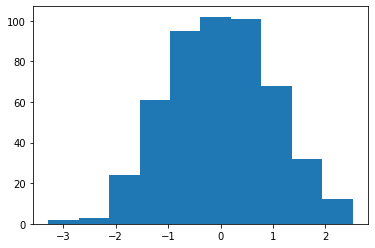

In [101]:
plt.hist(z_group["Age"])

# Operaciones diversas muy útiles

In [102]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,137.908120,82.795885,17.956254,20996.621555
2,Male,Rich,103.395009,52.924286,23.085472,16031.358534
3,Female,Poor,191.320809,109.246958,43.643251,23331.963906
4,Female,Middle Class,177.575859,101.706515,41.805981,19443.643634
6,Male,Poor,167.209354,36.495428,36.084783,26034.382928
7,Female,Rich,202.368736,48.838333,24.954494,21769.196284


In [103]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
482,Female,Poor,157.175130,62.539977,42.918571,23685.324030
492,Male,Poor,168.343504,42.709051,31.047280,18622.351483
496,Female,Rich,130.296930,48.729713,31.950557,22441.710828
497,Female,Middle Class,142.294451,62.327304,13.972160,18534.784189
498,Male,Middle Class,137.654015,90.267841,29.066714,20582.413558
499,Male,Rich,118.725577,116.067448,18.672584,13598.050349


In [104]:
# Antes de crear el objeto groupby primero ordenar los valores a lo que necesitamos

#Realizaremos una copia del data frame original
data_sorted = data.sort_values(["Age", "Income"])

In [105]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
468,Male,Rich,182.477381,110.944963,-8.367343,11837.458111
276,Female,Rich,151.774559,87.744414,-5.923006,17153.747964
427,Female,Middle Class,120.571178,53.856381,-0.518397,14731.320266
443,Male,Middle Class,193.756762,79.493080,2.025271,19130.437969
363,Female,Poor,208.827149,86.860995,2.693760,14811.953572


In [106]:
# Agrupación por género
age_grouped = data_sorted.groupby("Gender")

In [107]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
468,Male,Rich,182.477381,110.944963,-8.367343,11837.458111
276,Female,Rich,151.774559,87.744414,-5.923006,17153.747964
427,Female,Middle Class,120.571178,53.856381,-0.518397,14731.320266
443,Male,Middle Class,193.756762,79.493080,2.025271,19130.437969
363,Female,Poor,208.827149,86.860995,2.693760,14811.953572
116,Male,Middle Class,168.677433,32.254815,5.401274,17108.414979
329,Female,Middle Class,200.026781,43.241869,5.428041,18240.232140
36,Male,Poor,184.839846,54.774836,5.624462,16196.840803
155,Male,Poor,208.353610,74.450065,5.986088,17391.839407
390,Female,Poor,129.217617,79.490725,6.149408,21744.959332


In [108]:
# Ver a los más viejos del grupo
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
375,Male,Poor,163.962849,8.849891,60.431889,19948.022458
432,Female,Rich,162.888941,89.600077,63.960341,26658.110903


In [109]:
# Los más jóvenes del grupo
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
468,Male,Rich,182.477381,110.944963,-8.367343,11837.458111
276,Female,Rich,151.774559,87.744414,-5.923006,17153.747964


## Conjunto de entrenamiento y conjunto de testing

In [110]:
import pandas as pd

In [111]:
data = pd.read_csv("/Users/nuelcodes/Data-Science-Python/datasets/customer-churn-model/Customer Churn Model.txt")

In [112]:
len(data)

3333

### Dividir utilizando las distribución normal

In [113]:
# Crear un vector de la misma longitud que nuestros datos, pero distribuido de forma normal
a = np.random.randn(len(data))

(array([  5.,  18., 123., 392., 795., 845., 737., 320.,  79.,  19.]),
 array([-3.86466614, -3.14344411, -2.42222208, -1.70100005, -0.97977802,
        -0.25855599,  0.46266604,  1.18388807,  1.9051101 ,  2.62633213,
         3.34755416]),
 <a list of 10 Patch objects>)

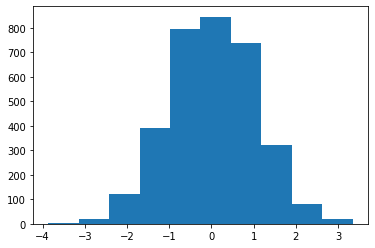

In [114]:
plt.hist(a)

In [124]:
check = (a<0.75)

In [125]:
check

array([ True,  True,  True, ...,  True,  True,  True])

In [126]:
training = data[check]
testing = data[~check]

In [127]:
len(training)

2522

In [128]:
len(testing)

811

### Con la librería SKLEARN (Librería de aprendizaje estadístico de python)

In [135]:
# se cambio el cross.validation (deprecated) por model_selection
from sklearn.model_selection import train_test_split

In [136]:
train, test = train_test_split(data, test_size = 0.25)

In [137]:
len(train)

2499

In [138]:
len(test)

834

### Usando una función de SHUFFLE

In [142]:
import sklearn

In [143]:
# Primero mezclar el dataset
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1676,WA,83,408,338-4472,no,no,0,134.8,96,22.92,...,78,14.21,161.5,123,7.27,7.7,5,2.08,2,False.
3070,MD,154,510,411-2977,no,no,0,154.5,122,26.27,...,71,18.21,178.0,105,8.01,12.0,2,3.24,3,True.
2836,DE,112,408,351-8894,no,no,0,101.1,119,17.19,...,67,18.22,179.5,112,8.08,10.3,5,2.78,2,False.
1134,TN,105,408,353-8849,no,no,0,206.2,84,35.05,...,138,21.79,117.1,91,5.27,9.0,3,2.43,1,False.
1443,SD,113,415,406-4560,yes,no,0,204.3,82,34.73,...,115,16.05,139.4,97,6.27,9.2,7,2.48,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
2874,WY,134,510,366-1084,no,no,0,296.0,93,50.32,...,117,19.24,246.8,98,11.11,12.3,10,3.32,0,True.
2744,CA,33,408,369-2743,no,no,0,159.5,115,27.12,...,118,16.61,102.4,86,4.61,7.1,7,1.92,1,False.
752,CO,22,510,327-1319,no,yes,23,182.1,94,30.96,...,59,13.99,128.8,102,5.80,12.7,4,3.43,3,False.


In [144]:
# lo volvemos a guardar en data
data = sklearn.utils.shuffle(data)

In [145]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [146]:
len(train_data)

2499

In [147]:
len(test_data)

833